In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [92]:
model = keras.models.load_model('atomic_model.h5')

In [93]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 1, 200, 4)         16        
                                                                 
 max_pooling1 (MaxPooling2D)  (None, 1, 100, 4)        0         
                                                                 
 conv_layer2 (Conv2D)        (None, 1, 100, 4)         52        
                                                                 
 max_pooling2 (MaxPooling2D)  (None, 1, 50, 4)         0         
                                                                 
 flatten_8 (Flatten)         (None, 200)               0         
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 40)               

In [112]:
array = np.full((1, 1, 200, 1), 170, dtype=np.uint8)

In [159]:
array = array[None, None, ..., None]

In [160]:
array.shape

(1, 1, 200, 1)

In [161]:
model.predict(array)

1/1 [==============================] - 0s 18ms/step


array([[0.05971057]], dtype=float32)

In [155]:
array = np.array([], dtype=np.uint8)

In [156]:
with open('test.raw', 'rb') as file:
  data = file.read()
  array = np.frombuffer(data, dtype=np.uint8)

In [157]:
array = array[3200:3400]

In [158]:
array

array([162, 238, 115,  65,  84, 129, 155, 129,  98, 105, 114, 120, 130,
       122, 117, 115, 125, 155, 128, 101, 110, 119, 126, 150, 117, 101,
       102, 111, 119, 127, 120, 119, 116, 115, 118, 136, 141, 107, 105,
       112, 130, 120, 112, 112, 114, 120, 123, 119, 115, 113, 128, 142,
       122, 103, 102, 108, 117, 134, 129, 108, 103, 107, 110, 113, 115,
       116, 114, 115, 116, 117, 117, 117, 117, 117, 118, 118, 116, 115,
       115, 115, 116, 117, 116, 117, 119, 116, 114, 116, 117, 117, 116,
       115, 116, 117, 119, 118, 117, 115, 115, 121, 124, 116, 111, 111,
       124, 137, 120, 105, 106, 111, 113, 115, 117, 117, 117, 117, 117,
       119, 119, 116, 115, 116, 117, 119, 127, 124, 112, 112, 116, 116,
       119, 124, 117, 114, 115, 119, 119, 117, 115, 118, 117, 118, 118,
       117, 117, 117, 120, 122, 116, 114, 115, 125, 124, 114, 111, 113,
       116, 116, 116, 118, 120, 117, 114, 116, 119, 120, 116, 114, 114,
       117, 120, 117, 115, 115, 115, 116, 117, 118, 116, 117, 11

In [147]:
array.shape

(18405,)

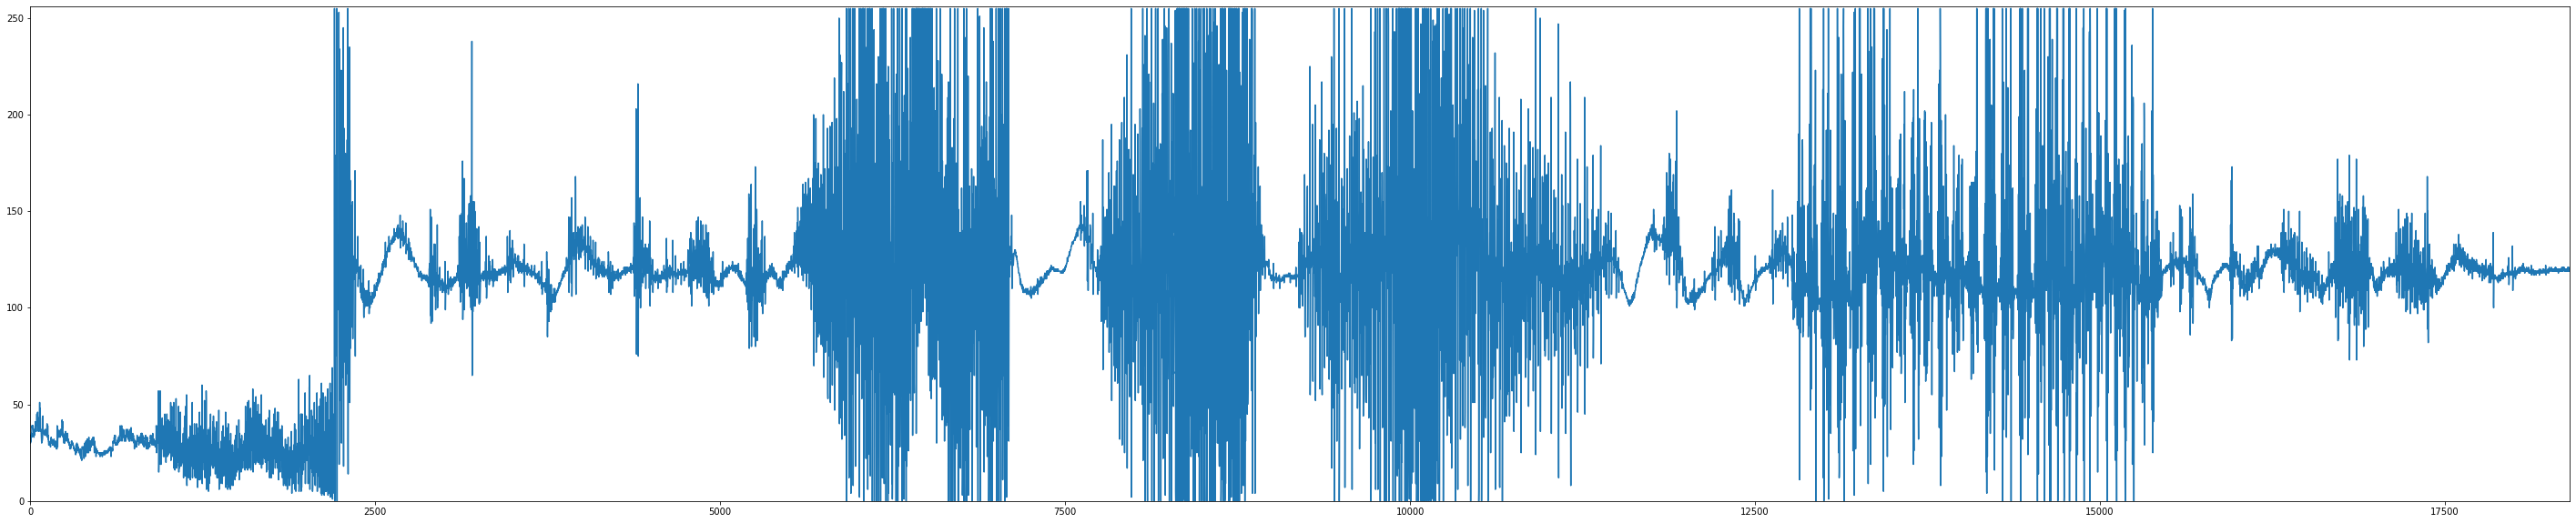

In [ ]:
plt.figure(figsize=(50,10))
plt.axis([0, array.shape[0], 0, 256])
plt.plot(array)

In [ ]:
array = array[0 : 18400] #multiple of window size

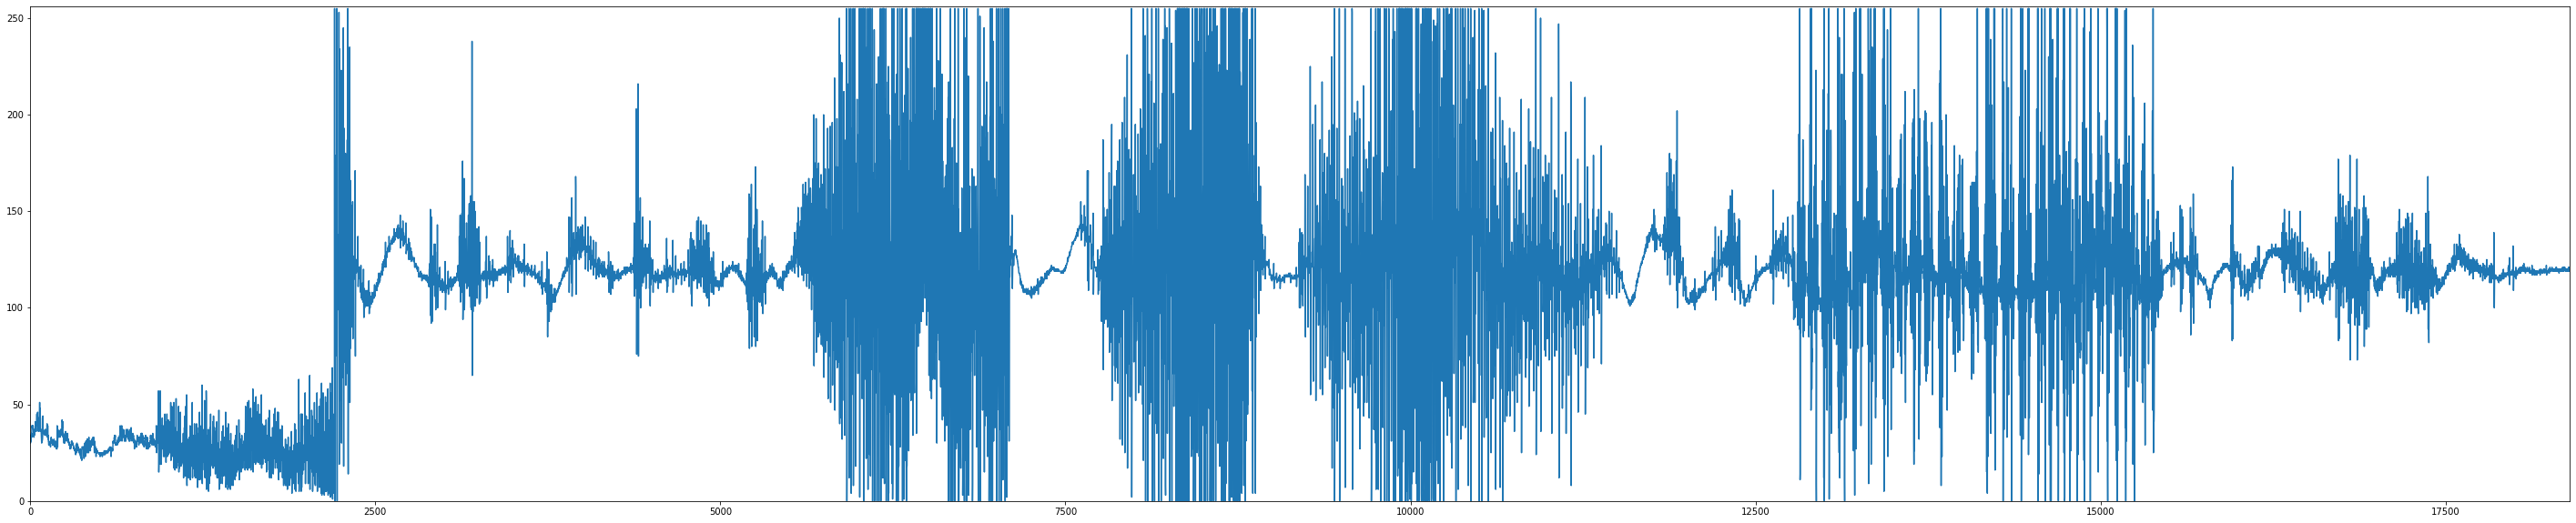

In [ ]:
plt.figure(figsize=(50,10))
plt.axis([0, array.shape[0], 0, 256])
plt.plot(array)

In [ ]:
array.shape

(18400,)

In [ ]:
#splitting data on same-size windows
window_size = 200
overlapping_size = 160

In [ ]:
windowed = np.empty([(array.shape[0] - window_size) // (window_size - overlapping_size) + 1, 1, window_size]) #remove third dim, if using 1d conv model
windowed.shape

(456, 1, 200)

In [ ]:
window_num = 0
for i in range(0, array.shape[0]-window_size + 1, window_size-overlapping_size):
  windowed[window_num] = array[i : i + window_size][None, ...] #remove second '[None, ...]', if using 1d conv model
  window_num += 1

In [ ]:
windowed.shape

(456, 1, 200)

Visualize windows


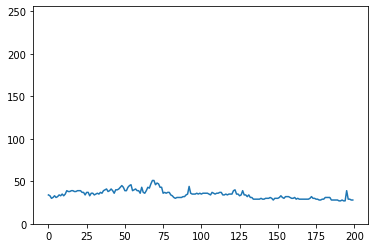

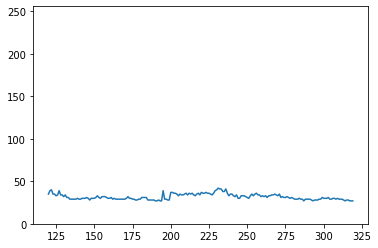

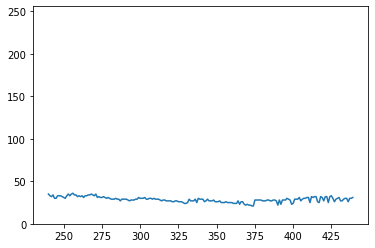

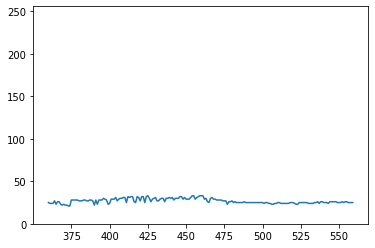

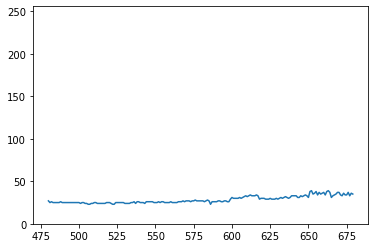

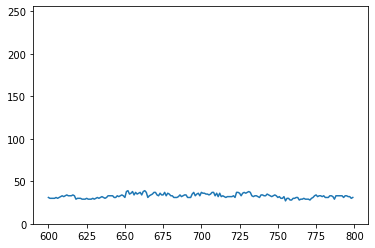

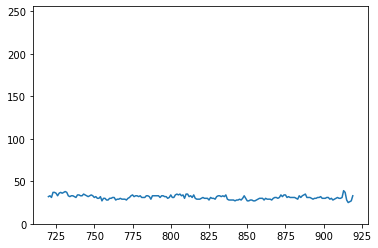

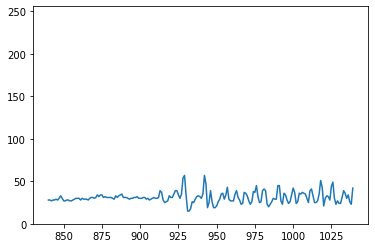

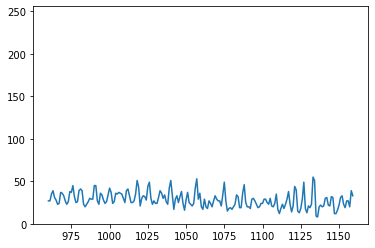

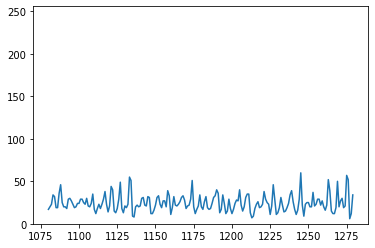

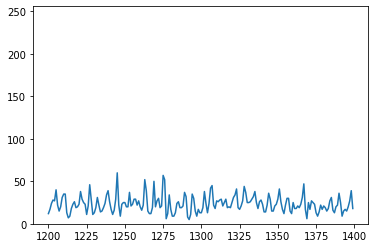

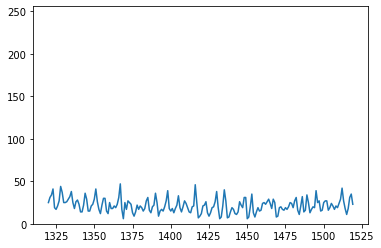

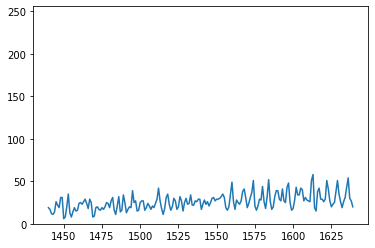

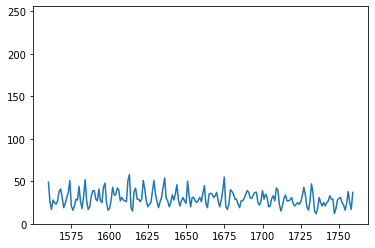

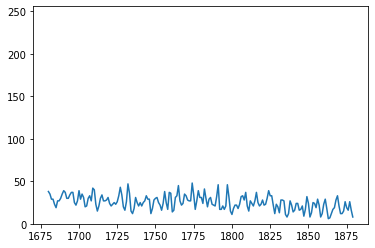

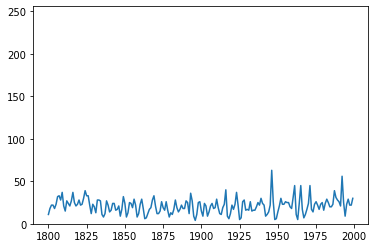

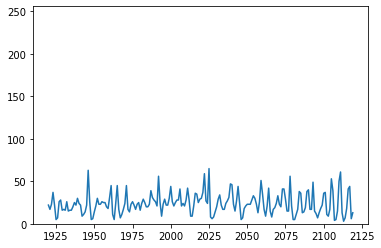

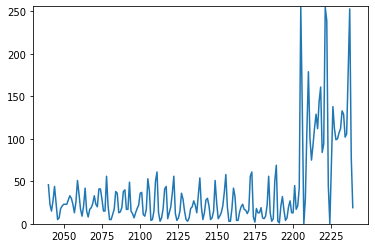

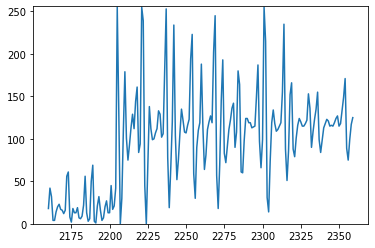

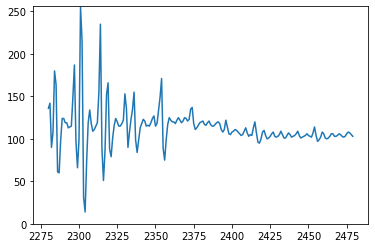

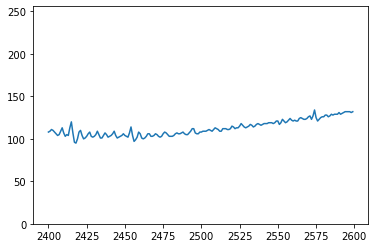

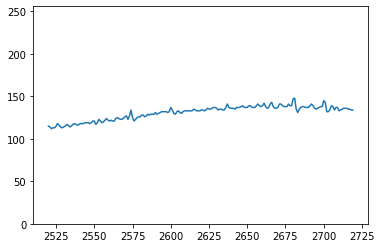

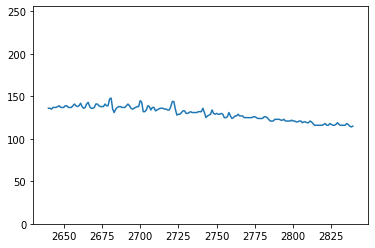

In [ ]:
for i in range(0, 69, 3):
  window = windowed[i][0]
  plt.ylim([0, 256])
  plt.plot(range(i * (window_size - overlapping_size), i * (window_size - overlapping_size) + window_size), window)
  plt.show()

In [ ]:
windowed.shape

(456, 1, 200)

In [ ]:
reshape_windowed = windowed[..., None]

In [ ]:
reshape_windowed.shape

(456, 1, 200, 1)

In [ ]:
predicts = model.predict(reshape_windowed)

15/15 [==============================] - 0s 2ms/step


In [ ]:
predicts.shape

(456, 1)

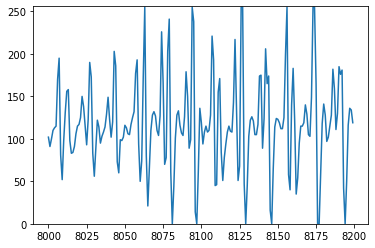

[0.99999624]


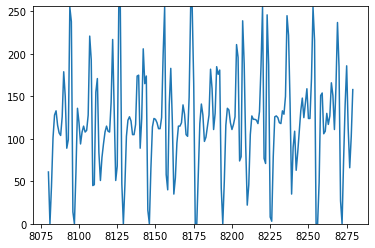

[1.]


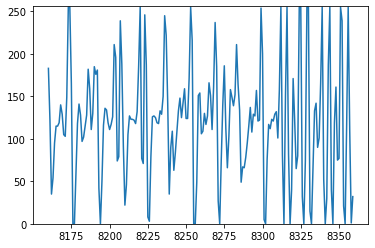

[1.]


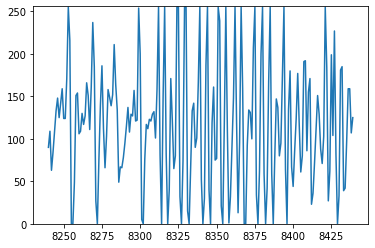

[1.]


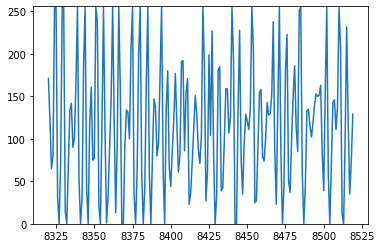

[1.]


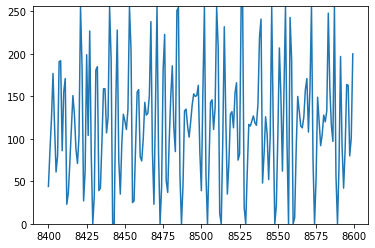

[1.]


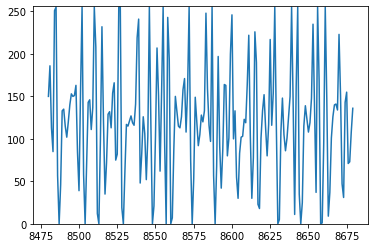

[1.]


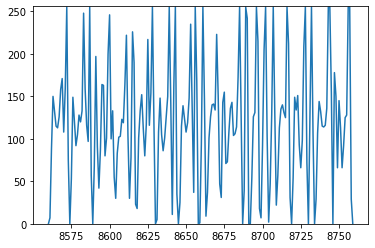

[1.]


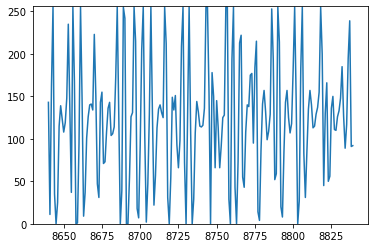

[1.]


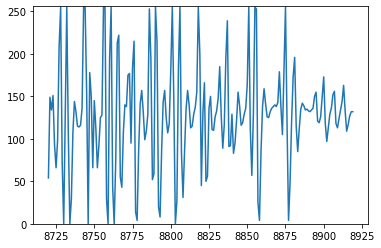

[1.]


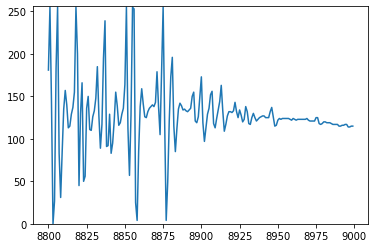

[0.9850132]


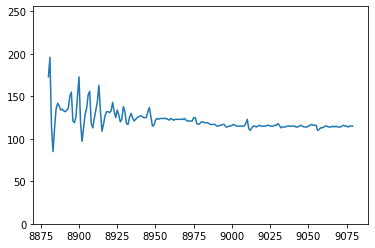

[0.04513578]


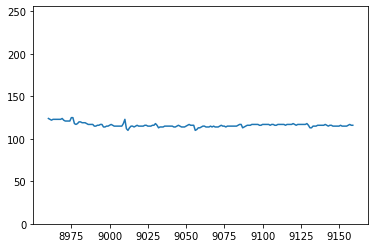

[0.09657001]


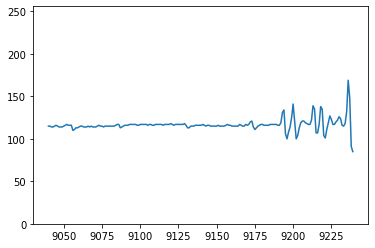

[0.12474412]


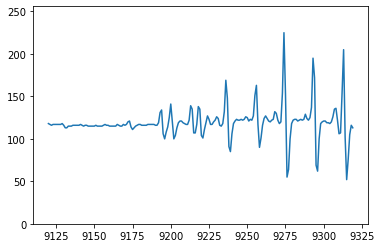

[0.93163806]


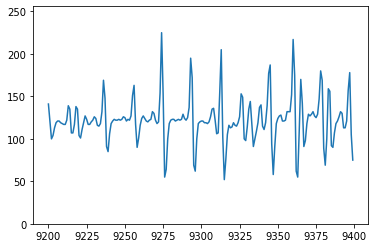

[0.9992078]


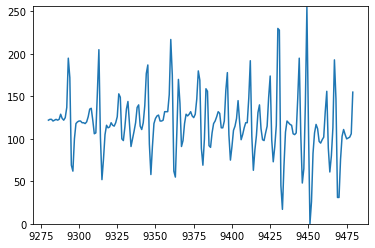

[1.]


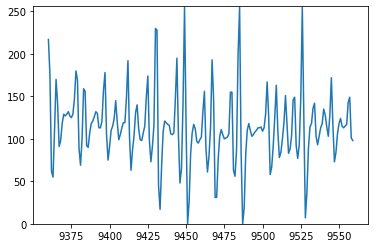

[1.]


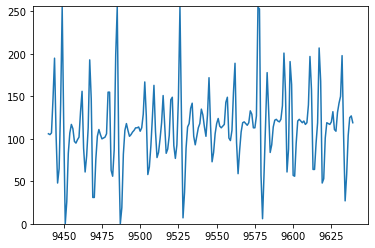

[0.9999991]


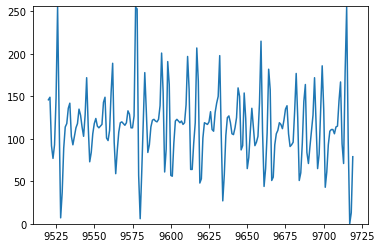

[0.9999996]


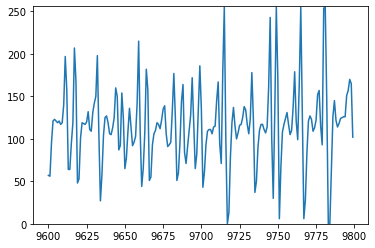

[1.]


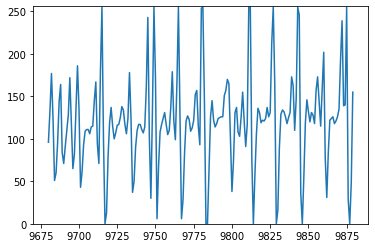

[0.9999805]


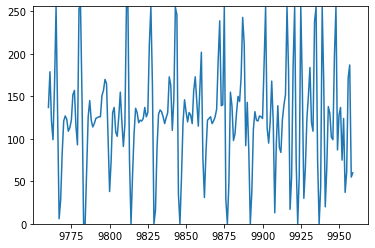

[1.]


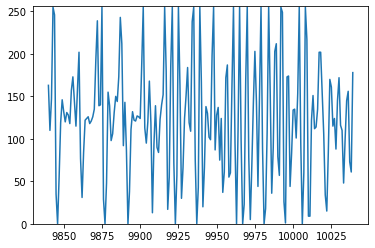

[1.]


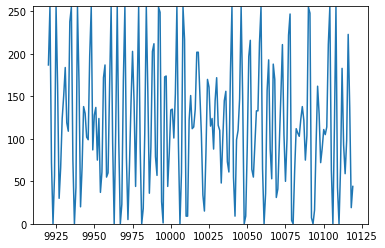

[1.]


In [ ]:
for i in range(200, 250, 2):
  window = windowed[i][0]
  plt.ylim([0, 256])
  plt.plot(range(i * (window_size - overlapping_size), i * (window_size - overlapping_size) + window_size), window)
  plt.show()
  print(predicts[i])

In [ ]:
processed_signal = pd.DataFrame(windowed[0][0], columns=['Signal'])

In [ ]:
for window in windowed[1:]:
  window = window[0]
  processed_signal = processed_signal.append(pd.DataFrame(window[160:], columns=['Signal']))

<ipython-input-38-2c1ad9a1e879>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_signal = processed_signal.append(pd.DataFrame(window[160:], columns=['Signal']))
<ipython-input-38-2c1ad9a1e879>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_signal = processed_signal.append(pd.DataFrame(window[160:], columns=['Signal']))
<ipython-input-38-2c1ad9a1e879>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_signal = processed_signal.append(pd.DataFrame(window[160:], columns=['Signal']))
<ipython-input-38-2c1ad9a1e879>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_signal = processed_signal.append(pd.D

In [ ]:
processed_signal

,Signal
0,34.0
1,33.0
2,30.0
3,31.0
4,33.0
...,...
35,120.0
36,119.0
37,121.0
38,121.0


In [ ]:
processed_signal.reset_index(inplace=True)
processed_signal.drop('index', axis=1, inplace=True)

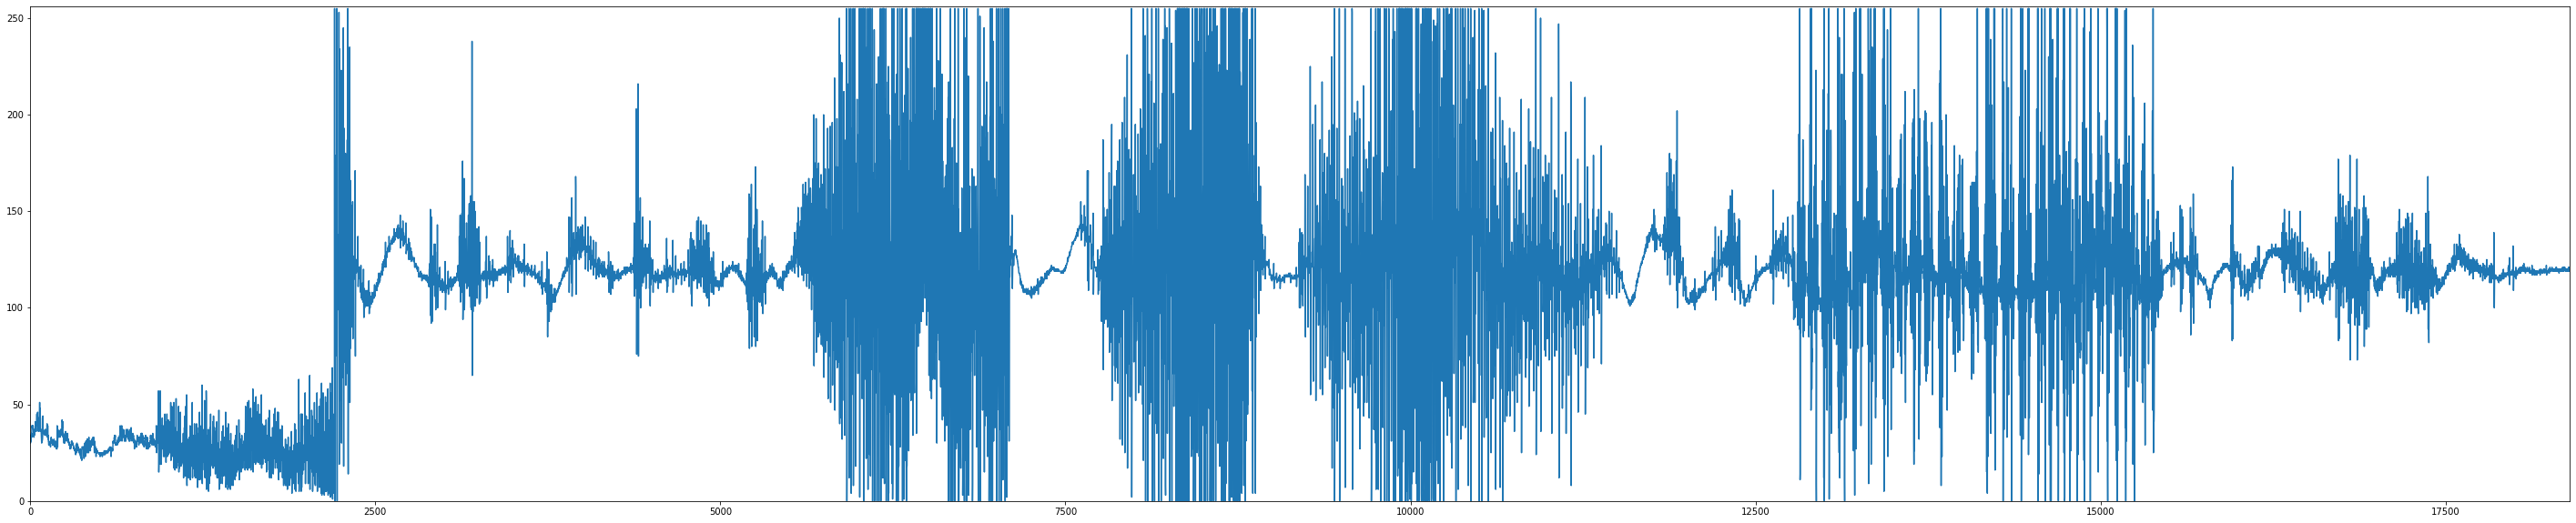

In [ ]:
plt.figure(figsize=(50,10))
plt.axis([0, processed_signal.shape[0], 0, 256])
plt.plot(processed_signal)

We have concated windows back to whole signal. Now add prediction column

In [ ]:
processed_signal['isActive'] = 0

In [ ]:
processed_signal

,Signal,isActive
0,34.0,0.525279
1,33.0,0.525279
2,30.0,0.525279
3,31.0,0.525279
4,33.0,0.525279
...,...,...
18395,120.0,0.111532
18396,119.0,0.111532
18397,121.0,0.111532
18398,121.0,0.111532


In [ ]:
for i in range(0, processed_signal.shape[0]):
  if processed_signal.loc[i, 'isActive'] == 0:
    processed_signal.loc[i, 'isActive'] = predicts[i // 200][0]
  else:
    processed_signal.loc[i, 'isActive'] = np.mean(processed_signal.loc[i, 'isActive'], predicts[window_num][0])

Vizualize prediction

In [ ]:
def color_via_value(prediction):
  if prediction < 0.5:
    return 'blue'
  else:
    return 'red'

In [ ]:
colors = [color_via_value(processed_signal.loc[i, 'isActive']) for i in processed_signal.index]

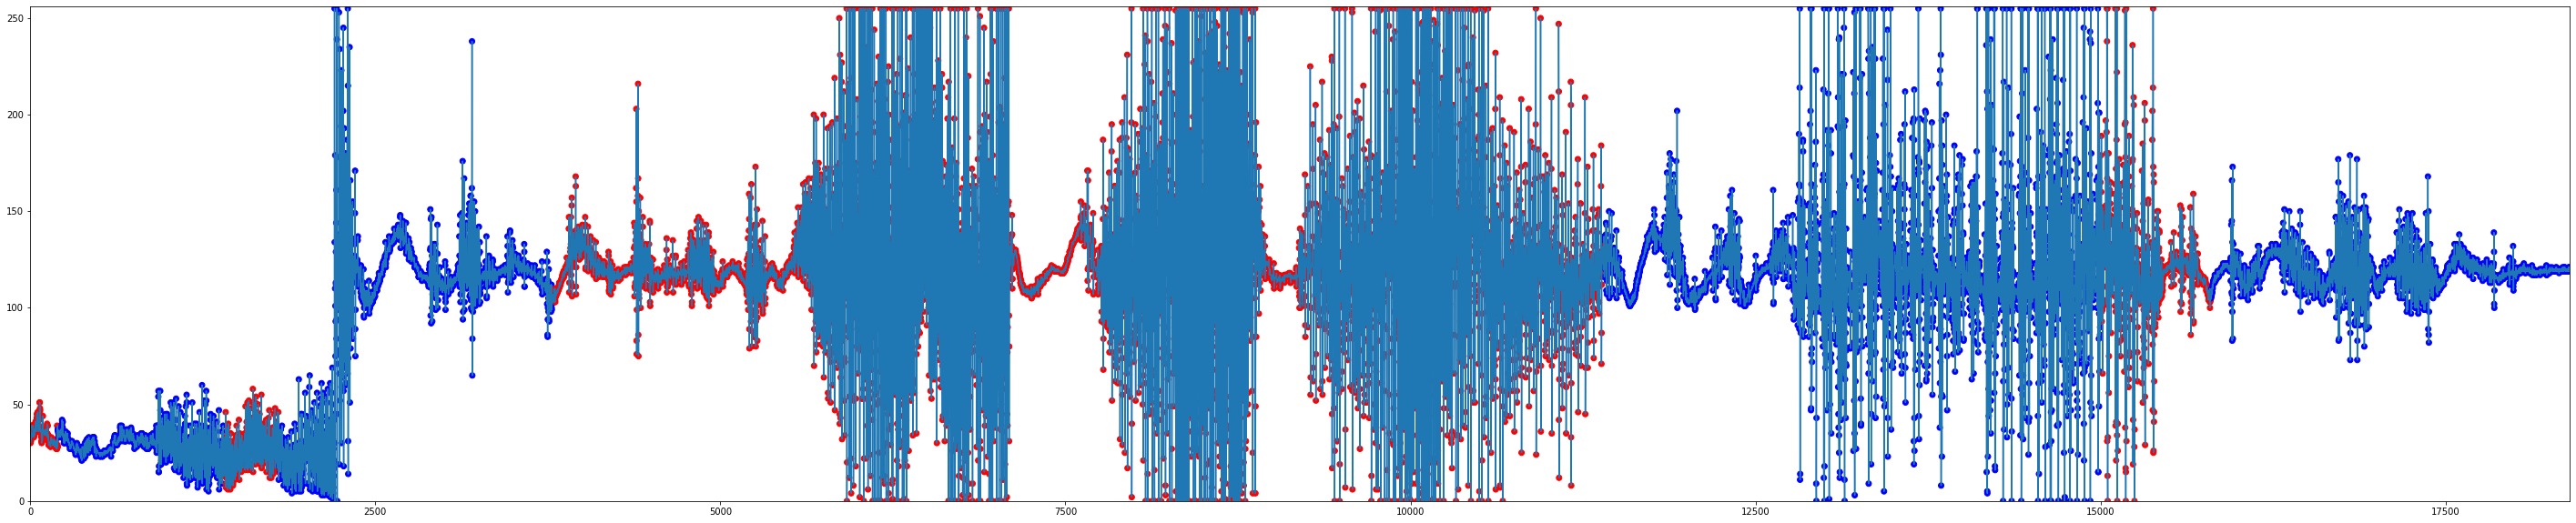

In [ ]:
plt.figure(figsize=(50,10))
plt.axis([0, processed_signal.shape[0], 0, 256])
plt.scatter(processed_signal.index, processed_signal['Signal'], c=colors)
plt.plot(processed_signal.index, processed_signal['Signal'])

OK result